In [3]:
try:
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords
    from nltk.util import ngrams

    import matplotlib.pyplot as plt
    import seaborn as sns
    import spacy
    from spacy import displacy
    import re
    import json
    import pandas as pd
    import sklearn
    from collections import Counter

    from bs4 import BeautifulSoup
    import requests
    import wikipedia as wk
    
except:
    !pip install -r requirements.txt
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords
    from nltk.util import ngrams

    import matplotlib.pyplot as plt
    import seaborn as sns
    import spacy
    from spacy import displacy
    import re
    import json
    import pandas as pd
    import sklearn
    from collections import Counter

    from bs4 import BeautifulSoup
    import requests
    import wikipedia as wk

In [4]:
raw_text = open('All_directions.txt', 'r').readlines()
raw_text_lines = [sent.lower() for sent in raw_text]

text = ''
text_lines = []

with open('cookie_lines.jsonl', 'w+') as outfile:
    for line in raw_text_lines:
        if len(line)>2:
            sentences = sent_tokenize(line.strip('\n'))
            items = [{'text':sent} for sent in sentences]
            for item in items:
                text+=' {}'.format(item['text'])
                text_lines.append(item['text'])
                json.dump(item, outfile)
                outfile.write('\n')
            
for line in raw_text_lines[0:4]:
    print(line,'\n')

preheat oven to 350 degrees f (175 degrees c).
 

cream together the butter, white sugar, and brown sugar until smooth. beat in the eggs one at a time, then stir in the vanilla. dissolve baking soda in hot water.  add to batter along with salt. stir in flour, chocolate chips, and nuts. drop by large spoonfuls onto ungreased pans.
 

bake for about 10 minutes in the preheated oven, or until edges are nicely browned.
 

preheat oven to 350 degrees f (175 degrees c).
 



In [5]:
with open('cookie_lines.jsonl') as infile:
    lines = list(infile)
text_lines = [json.loads(line) for line in lines]
text_sentences = [item['text'] for item in text_lines]

In [6]:
# Code adapted from https://www.mediawiki.org/wiki/API:Categorymembers

def get_wiki_category_members(category, num_members=50):
    
    S = requests.Session()

    URL = "https://en.wikipedia.org/w/api.php"

    PARAMS = {
        "action": "query",
        "cmtitle": "Category:{}".format(category),
        "cmlimit": "200",
        "list": "categorymembers",
        "format": "json"
    }

    R = S.get(url=URL, params=PARAMS)
    DATA = R.json()

    PAGES = DATA['query']['categorymembers']
    
    return PAGES

In [7]:
# Call function and store list of categories in variable

categories = get_wiki_category_members('Cookies', num_members=150)

In [8]:
### Crawl each wikipage in my categories for data

# Initialize empty list for my corpus
corpus = []

# Iterate over category
for item in categories:
    
    # Store title and page pointer
    pageid_ = item['pageid']
    title = item['title']
    
    try:
        
        item_corpus = []
        
        # Fetch wikipedia data using wikipedia API
        page = wk.page(pageid=pageid_, auto_suggest=False)
        # Get text items - definitely summary, maybe recipe, and maybe ingredients
        summary = page.summary
        recipe = page.section('Recipe')
        ingredients = page.section('Ingredients')
        
        if recipe is not None:
            item_corpus.extend(sent_tokenize(recipe))
        if ingredients is not None:
            item_corpus.extend(sent_tokenize(ingredients))
            
        item_corpus.extend(sent_tokenize(summary))
        
        # Append each sentence to main corpus
        for sentence in item_corpus:
            corpus.append({'text':sentence.replace('\n', ' '), 'title':title})
        print('{} - 1'.format(title))
        
    except:
        # This prints if things didn't work for some reason
        print('{} - 0'.format(title))

Cookie - 1
Ranger Cookie - 1
List of cookies - 1
Ammonia cookie - 1
Angel wings - 1
Animal cracker - 1
Apple cider cookie - 1
Baci di dama - 1
Bizcochito - 1
Black and white cookie - 1
Borio - 1
Butter cookie - 1
Butter pecan - 1
Camachile cookie - 1
Canestrelli - 1
Carrot cake cookie - 1
Cat tongue - 1
Caycay - 1
Chocolate chip cookie - 1
Chocolate chip cookie dough ice cream - 1
Christmas cookie - 1
Colaz - 1
Cookie bouquet - 1
Cookie butter - 1
Cookie cake - 1
Cookie Crisp - 1
Cookie decorating - 1
Cookie dough - 1
Cookie pusher - 1
Cookie salad - 1
The Cookie Thief - 1
Corn cookie - 1
Cornish fairing - 1
Coyotas - 1
Cuccidati - 1
Dessert bar - 1
Dutch letter - 1
Finikia - 1
Flour kurabiye - 1
Fortune cookie - 1
Fudge cookie - 1
Gebildbrot - 1
Ginger snap - 1
Gingerbread - 1
Gingerbread man - 1
Guyuria - 1
Half-moon cookie (Philippines) - 1
Hallongrotta - 1
Hertzoggie - 1
Hodu-gwaja - 1
IJzerkoekje - 1
Impade - 1
Janhagel - 1
Jewish almond cookie - 1
Jodenkoek - 1
Joe Frogger - 1
Ju

In [9]:
### Let's now look at main page for cookies

# Make call to API
wikiCookie = wk.page('Cookie', auto_suggest=False)

# Get the page links on this page
cookieRelatedEntities = list(wikiCookie.links)

In [10]:
### Define set of previously crawled wikipedia pages so there is much less data redundance
existing_set = set([item['title'] for item in categories])

In [11]:
### Perform same crawl but for related page links - but only if that page hasn't previously been parsed

for title in cookieRelatedEntities:
    if title not in existing_set:
        try:
        
            item_corpus = []

            page = wk.page(title, auto_suggest=False)
            summary = page.summary
            recipe = page.section('Recipe')
            ingredients = page.section('Ingredients')

            if recipe is not None:
                item_corpus.extend(sent_tokenize(recipe))
            if ingredients is not None:
                item_corpus.extend(sent_tokenize(ingredients))

            item_corpus.extend(sent_tokenize(summary))

            for sentence in item_corpus:
                corpus.append({'text':sentence.replace('\n', ' '), 'title':title})
            print('{} - 1'.format(title))

        except:
            print('{} - 0'.format(title))

Acıbadem kurabiyesi - 1
Added sugar - 1
Alfajor - 1
American English - 1
Amsterdam University Press - 1
Angel Wings - 1
Animal crackers - 1
Anna's Swedish Thins - 1
Anzac biscuit - 1
Archway Cookies - 1
Arnott's Biscuits - 1
Aryzta - 1
BBC News - 1
Bahlsen - 1
Bakarkhani - 1
Baked goods - 1
Bakery - 1
Baking soda - 1
Barnum's Animals - 0
Berger Cookies - 1
Berliner (pastry) - 1
Berner Haselnusslebkuchen - 1
Betty Crocker - 1
Biscoff - 1
Biscotti - 1
Biscuit - 1
Biscuit rose de Reims - 1
Biscuit tin - 1
Biscuits - 1
Blondie (confection) - 1
Bourbon biscuit - 1
British English - 1
Bun - 1
Burton's Foods - 1
Butter - 1
Cadbury - 1
Cake - 1
Campbell Soup Company - 1
Candy - 1
Carbon dioxide - 1
Carr's - 1
Children's television series - 1
Chips Ahoy! - 1
Chips Deluxe - 1
Chocolate - 1
Chocolate-coated marshmallow treat - 1
Chocolate biscuit - 1
Chocolate brownie - 1
Chocolate chip - 1
Chocolate digestive - 1
Christmas cookies - 1
Churro - 1
Coffee - 1
Coffeehouse - 1
Convenience store - 1


C:\Users\imichel-tyler\Anaconda3\envs\cookies\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\imichel-tyler\Anaconda3\envs\cookies\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Cookie (disambiguation) - 0
Cookie Clicker - 1
Cookie Monster - 1
Cookie cutter - 1
Cookie exchange - 1
Cookie jar - 1
Cookie press - 1
Cookie sandwich - 1
Cookie table - 1
Cookies and cream - 1
Cooking oil - 1
Cracker (food) - 1
Cupcake - 1
Custard cream - 1
D.F. Stauffer Biscuit Company - 1
Danish Butter Cookies - 0
Danish pastry - 1
Date square - 1
Date squares - 1
DeBeukelaer - 1
Dessert - 1
Digestive biscuit - 1
Diminutive form - 1
Domino (cookie) - 1
Doughnut - 1
Duncan Hines - 1
Dunking (biscuit) - 1
Dutch language - 1
Elizabeth I - 1
Encyclopædia Britannica - 1
Famous Amos - 1
Fat - 1
Fat rascal - 1
Fattigmann - 1
Fazer - 1
Ferrero SpA - 1
Fig Newton - 1
Financial Times - 1
Finland - 1
Flies graveyard - 1
Florentine biscuit - 1
Flour - 1
Fox's Biscuits - 1
Fruit - 1
Fudge Shoppe - 0
Funnel cake - 1
Galette - 1
General Mills - 1
Gingerbread house - 1
Girl Scout cookie - 1
Graham cracker - 1
Grocery store - 1
HTTP cookie - 1
Halvah - 1
Hamantash - 1
Hamentashen - 1
Hello Panda - 

In [12]:
### Combine recipe step dataset with wikipedia dataset
full_dataset = text_sentences

for line in corpus:
    full_dataset.append(line['text'].lower())
    
print(len(full_dataset))

4965


In [15]:
### Visualize pre-processing steps
try:
    stop_words = set(stopwords.words('english'))
except:
    from nltk import download
    download('stopwords')
    stop_words = set(stopwords.words('english'))

    
punctuation = set(['.', ',', "'", '"', '/', ':', ';', '!', '?', '(', ')', '[', ']'])

text = text_sentences[1000]
print('Raw Sentence:\n',text, '\n')

tokenized_sentence = [word for word in word_tokenize(text) if word not in stop_words and word not in punctuation]
tok_str = ', '.join([word for word in tokenized_sentence]).strip(',')
print('Tokenized Sentence:\n[{}]'.format(tok_str))
# for token in tokenized_sentence:
#     print(token)

Raw Sentence:
 using an electric mixer on medium speed, beat butter, granulated sugar, and brown sugar in a large bowl until light and fluffy, 34 minutes. 

Tokenized Sentence:
[using, electric, mixer, medium, speed, beat, butter, granulated, sugar, brown, sugar, large, bowl, light, fluffy, 34, minutes]


In [16]:
### Here is a function to generate n-grams from the corpus

def generate_ngram_counts(corpus, start=1, stop=1):
    counts = Counter()
    stop_words = set(stopwords.words('english'))
    range_ = range(start, stop+1)
    
    for i in range_:
        for line in corpus:
            tokenized = word_tokenize(line.lower())
            ngrams_ = ngrams([token for token in tokenized if not re.match('\W', token) and token not in stop_words], i)
            for ngram in ngrams_:
                counts.update({' '.join([tok for tok in ngram]).strip():1})
                
                
    return counts
        

In [17]:
### Generate various n-gram counts

ngram_counts = generate_ngram_counts(full_dataset, start=1, stop=3)
print('next')
unigram_counts = generate_ngram_counts(full_dataset)
print('next')

bigram_counts = generate_ngram_counts(full_dataset, start=2, stop=2)
print('next')

trigram_counts = generate_ngram_counts(full_dataset, start=3, stop=3)
print('next')

ngram_counts_reduced = ngram_counts

next
next
next
next


In [19]:
with open('full_dataset.jsonl', 'w+', encoding='utf-8') as outfile:
    for line in full_dataset:
        item = {'text':line}
        json.dump(item, outfile)
        outfile.write('\n')

with open('full_dataset.jsonl', 'r', encoding='utf-8') as infile:
    lines = list(infile)
text_lines = [json.loads(line) for line in lines]
full_dataset = [item['text'] for item in text_lines]

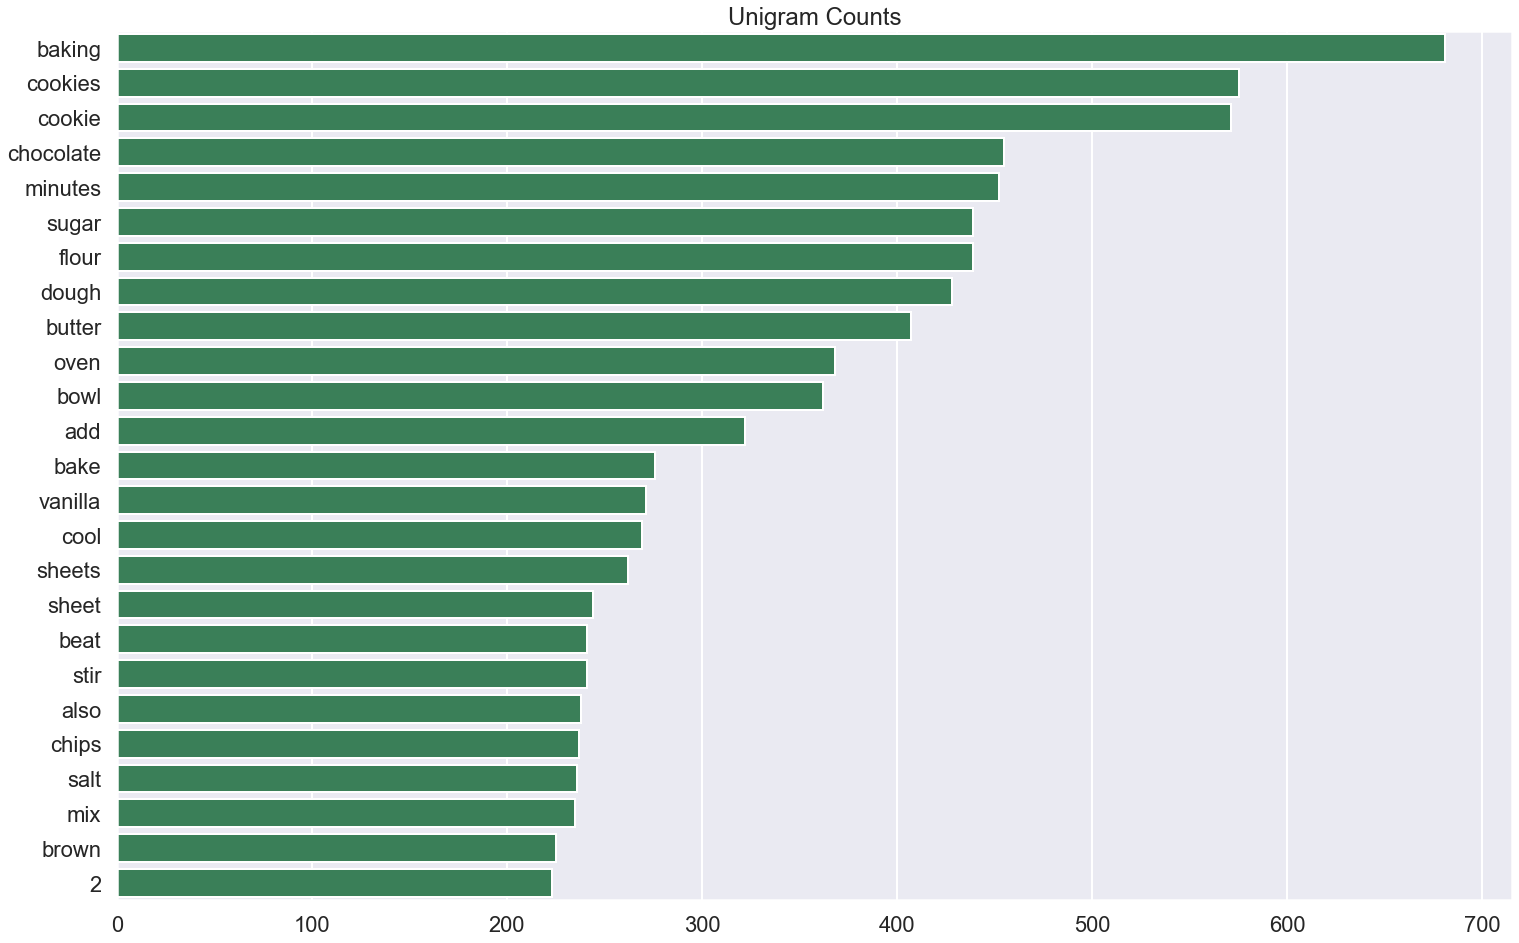

In [20]:
### Plot what you want

plotdata = pd.DataFrame(unigram_counts.most_common(25))
plt.figure(figsize=(25, 16))
sns.set_theme(context="poster")
plt.title('Unigram Counts')
sns.barplot(x = plotdata[1].values, y=plotdata[0].values, color='seagreen')
plt.savefig('unigram_25.png')
